In [1]:
import texthero as hero
import pandas as pd

In [2]:
df = pd.read_csv(
   "bbcsport.csv"
)

In [3]:
df.head(2)

,text,topic
0,Claxton hunting first major medal\n\nBritish h...,athletics
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics


In [4]:
df['text_clean'] = hero.clean(df['text'])

In [5]:
df['text_clean'] = df['text'].pipe(hero.clean)

In [6]:
from texthero import preprocessing

custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace]
df['clean_text'] = hero.clean(df['text'])

In [7]:
df['clean_text'] = df['clean_text'].pipe(hero.clean, custom_pipeline)

In [8]:
df['tfidf_clean_text'] = hero.tfidf(df['clean_text'])

In [9]:
df['pca_tfidf_clean_text'] = hero.pca(df['tfidf_clean_text'])

In [10]:
df['tsne'] = (
            df['text']
            .pipe(hero.clean)
            .pipe(hero.tfidf)
            .pipe(hero.tsne)
   )
hero.scatterplot(df, col='tsne', color='topic', title="TSNE BBC Sport news")

In [11]:
df['nmf'] = (
            df['text']
            .pipe(hero.clean)
            .pipe(hero.tfidf)
            .pipe(hero.nmf)
   )
hero.scatterplot(df, col='nmf', color='topic', title="NMF BBC Sport news")

In [15]:
df['pca'] = (
            df['text']
            .pipe(hero.clean)
            .pipe(hero.tfidf)
            .pipe(hero.pca)
   )

In [16]:
hero.scatterplot(df, col='pca', color='topic', title="PCA BBC Sport news")

In [17]:
NUM_TOP_WORDS = 5
df.groupby('topic')['text_clean'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

topic             
athletics  said       181
           world      160
           year       159
           olympic    137
           race       112
cricket    test       232
           england    225
           first      219
           cricket    216
           one        212
football   said       475
           chelsea    305
           game       297
           would      287
           club       274
rugby      england    395
           said       262
           wales      247
           ireland    229
           rugby      223
tennis     said       217
           open       164
           first      149
           set        140
           year       131
Name: text_clean, dtype: int64

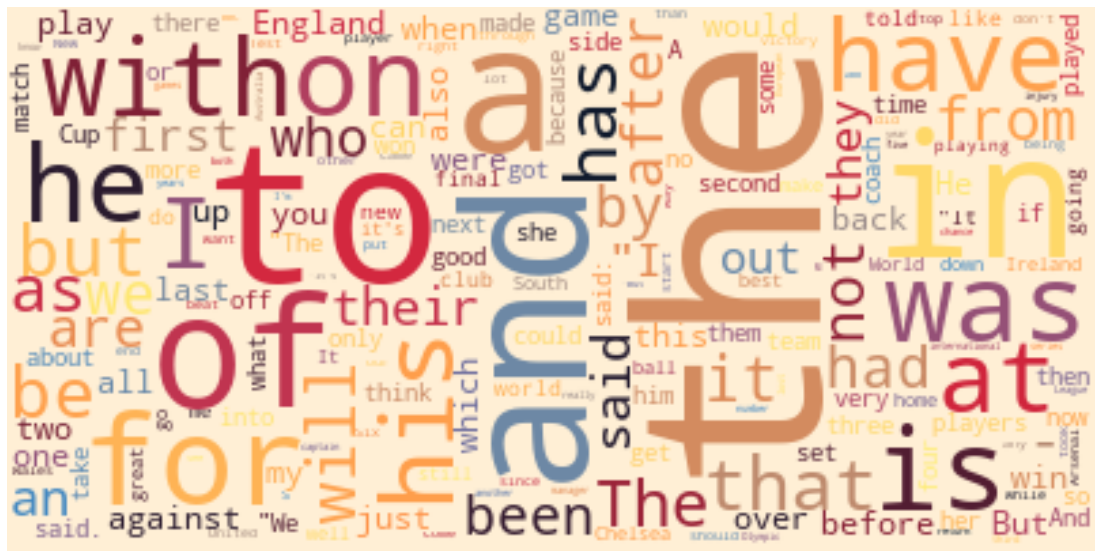

In [18]:
hero.wordcloud(df['text'])

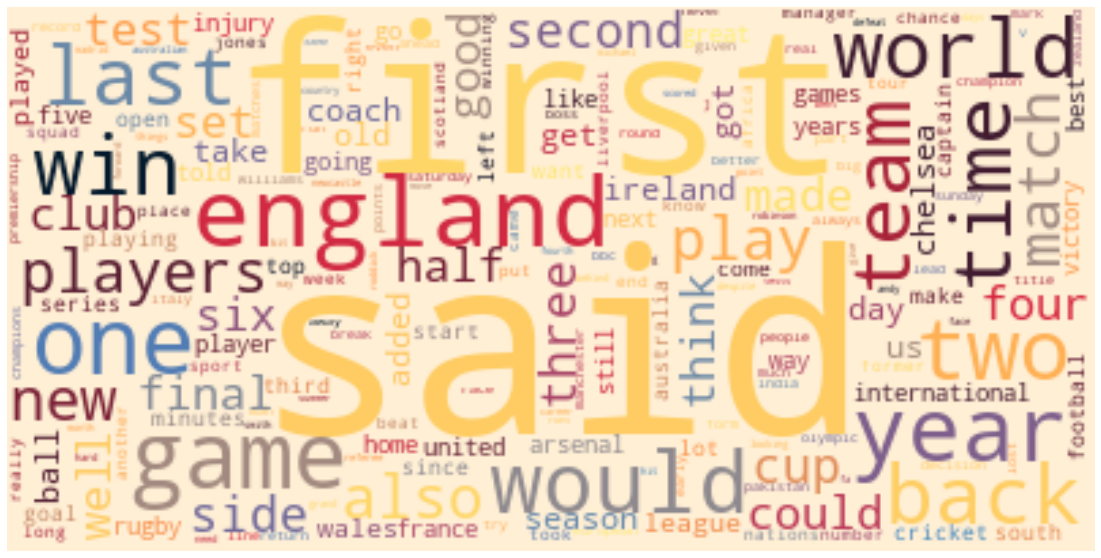

In [19]:
hero.wordcloud(df['text_clean'])

In [ ]:
df